In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

from utils.backtest_performance import get_NAICS_code_sector_name

In [2]:
NAICS_sector_code, NAICS_sector_name = get_NAICS_code_sector_name()

In [3]:
keywords_count = list()
path = "backtests/key_word_search/ESG_baseline"
for sector in NAICS_sector_name:
    file_name = f"{path}/{sector}/signal.csv"
    if not os.path.isfile(file_name):
        keywords_count.append(0)
        continue 
    signal = pd.read_csv(file_name)
    keywords_count.append((~signal.isna()).sum().sum())

In [4]:
LDA_count = list()
path = "backtests/LDA/ESG_baseline"
for sector in NAICS_sector_name:
    file_name = f"{path}/{sector}/signal.csv"
    if not os.path.isfile(file_name):
        LDA_count.append(0)
        continue 
    signal = pd.read_csv(file_name)
    LDA_count.append((~signal.isna()).sum().sum())

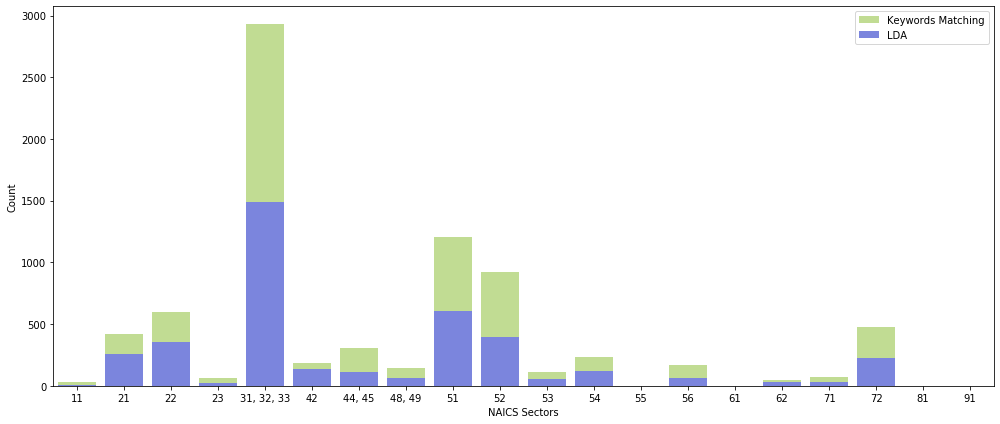

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)


sns.barplot(x=list(range(len(keywords_count))), y=keywords_count,color='#c4e887', label='Keywords Matching')
bottom_plot = sns.barplot(x=list(range(len(LDA_count))), y=LDA_count, color='#6b78ed', label='LDA')

ax.set(xlabel='NAICS Sectors', ylabel='Count')
ax.set_xticklabels([', '.join(code) for code in NAICS_sector_code], rotation=0, fontsize=10)
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
from glob import glob

keywords_file = "backtests/key_word_search/ESG_baseline/9_time_partitions/performance_evaluation_total.csv"
kdf = pd.read_csv(keywords_file)
time_label = (kdf['t0'].apply(lambda x: x[:4]) + " - " + kdf['t1'].apply(lambda x: x[:4])).tolist()
kcount = kdf['sample size'].tolist()

In [8]:
lda_file = "backtests/LDA/ESG_baseline/9_time_partitions/performance_evaluation_total.csv"
ldf = pd.read_csv(lda_file)
lcount = ldf['sample size'].tolist()

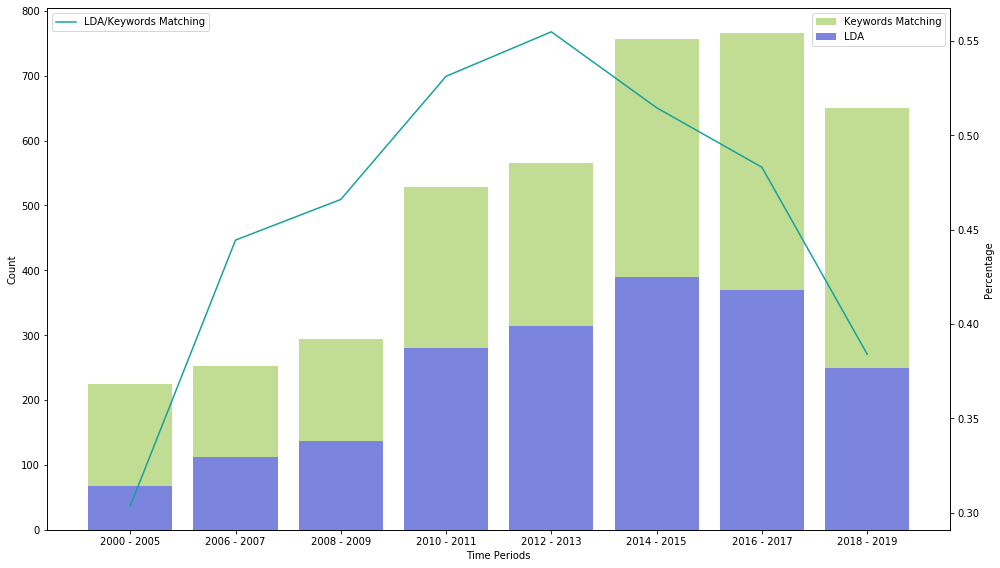

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
ax2 = ax.twinx()

sns.barplot(x=list(range(len(kcount))), y=kcount,color='#c4e887', label='Keywords Matching', ax=ax)
sns.barplot(x=list(range(len(lcount))), y=lcount, color='#6b78ed', label='LDA', ax=ax)
ax.set(xlabel='Time Periods', ylabel='Count')
ax.set_xticklabels(time_label, rotation=0, fontsize=10)
ax.legend(loc='upper right')

sns.lineplot(x=list(range(len(lcount))), y=np.array(lcount)/np.array(kcount), color= '#16a19c', label= 'LDA/Keywords Matching', ax=ax2)
ax2.set(ylabel='Percentage')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

